In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix



2025-04-17 12:39:44.931856: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-17 12:39:44.956202: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744886384.971934   12531 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744886384.976683   12531 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-17 12:39:45.000251: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
data = pd.read_csv("../models/Boiler_emulator_dataset.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27280 entries, 0 to 27279
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Fuel_Mdot   27280 non-null  int64  
 1   Tair        27280 non-null  int64  
 2   Treturn     27280 non-null  float64
 3   Tsupply     27280 non-null  float64
 4   Water_Mdot  27280 non-null  float64
 5   Condition   27280 non-null  object 
 6   Class       27280 non-null  object 
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [4]:
data.describe()

,Fuel_Mdot,Tair,Treturn,Tsupply,Water_Mdot
count,27280.000000,27280.000000,2.728000e+04,27280.000000,27280.000000
mean,2.500000,293.000000,3.330000e+02,341.973498,7.750000
std,1.118054,6.324671,1.023493e-07,5.743586,2.883193
min,1.000000,283.000000,3.330000e+02,334.612655,3.000000
25%,1.750000,287.000000,3.330000e+02,337.809324,5.375000
50%,2.500000,293.000000,3.330000e+02,340.576111,7.750000
75%,3.250000,299.000000,3.330000e+02,344.361267,10.125000
max,4.000000,303.000000,3.330000e+02,365.298602,12.500000


In [5]:
data["Class"].value_counts()

Class
Fouling      8800
Scaling      8800
ExcessAir    7040
Nominal      1760
Lean          880
Name: count, dtype: int64

In [6]:
data.head()

,Fuel_Mdot,Tair,Treturn,Tsupply,Water_Mdot,Condition,Class
0,1,283,333.0,363.574744,3.0,%=0.05,Lean
1,1,283,333.0,362.349517,3.0,%=0.1,Nominal
2,1,283,333.0,361.216941,3.0,%=0.15,ExcessAir
3,1,283,333.0,360.166890,3.0,%=0.20,ExcessAir
4,1,283,333.0,359.190662,3.0,%=0.25,ExcessAir


In [7]:
data.nunique()

Fuel_Mdot         4
Tair             11
Treturn           4
Tsupply       27276
Water_Mdot       20
Condition        31
Class             5
dtype: int64

<Axes: >

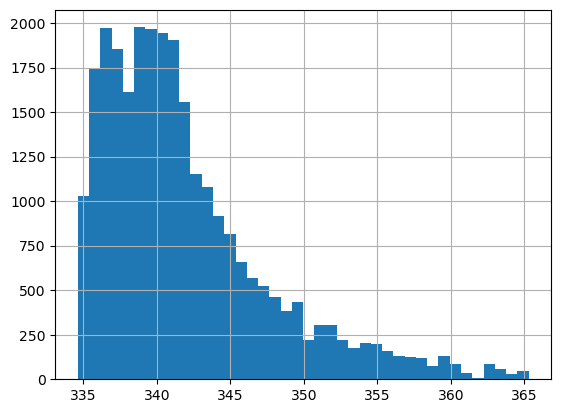

In [8]:
data["Tsupply"].hist(bins=40)

In [9]:
trainfull = data[["Fuel_Mdot","Tair","Treturn","Tsupply","Water_Mdot"]]

In [10]:
target = data["Class"]

In [11]:
target

0             Lean
1          Nominal
2        ExcessAir
3        ExcessAir
4        ExcessAir
           ...    
27275      Nominal
27276      Nominal
27277      Nominal
27278      Nominal
27279      Nominal
Name: Class, Length: 27280, dtype: object

In [12]:
scaler = MinMaxScaler()
scaler = scaler.fit(trainfull)
trainfull[:] = scaler.transform(trainfull)

/tmp/ipykernel_12531/2382886324.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainfull[:] = scaler.transform(trainfull)
/tmp/ipykernel_12531/2382886324.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.         0.         0.         ... 0.         0.66666667 1.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  trainfull[:] = scaler.transform(trainfull)
/tmp/ipykernel_12531/2382886324.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0. 0. 0. ... 1. 1. 1.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.


In [13]:
target_df= pd.DataFrame(target)

In [14]:
target_df= pd.DataFrame(target)
target_df.shape

(27280, 1)

In [15]:
one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_encoder.fit(target_df)
target_df_encoded = one_hot_encoder.transform(target_df)

In [16]:
X_train_full , X_test , y_train_full , y_test = train_test_split(trainfull, target_df_encoded, random_state=42)

In [17]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [18]:
X_train

,Fuel_Mdot,Tair,Treturn,Tsupply,Water_Mdot
13857,0.666667,0.3,0.333333,0.164088,0.263158
14741,0.666667,0.7,0.666667,0.195707,0.736842
1458,0.000000,0.7,0.333333,0.358826,0.263158
26342,1.000000,1.0,0.666667,0.113807,0.736842
20425,0.333333,0.3,0.000000,0.198156,0.105263
...,...,...,...,...,...
1309,0.000000,0.6,0.333333,0.221730,0.526316
10237,0.000000,0.7,0.000000,0.212646,0.157895
26328,1.000000,1.0,0.666667,0.027928,0.631579
16467,1.000000,0.5,0.333333,0.146373,0.315789


In [19]:
target.head(10)

0         Lean
1      Nominal
2    ExcessAir
3    ExcessAir
4    ExcessAir
5    ExcessAir
6    ExcessAir
7    ExcessAir
8    ExcessAir
9    ExcessAir
Name: Class, dtype: object

In [20]:
target_df_encoded[:10]

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [21]:
target.nunique()

5

In [22]:
n_features = X_train.shape[1]
n_classes = target.nunique()   # quantitative data

In [23]:
#kernel_initializer="he_normal", kernel_regularizer=tf.keras.regularizers.l2(0.01), use_bias=False)
#model.add(tf.keras.layers.Dropout(0.20))


In [24]:
tf.random.set_seed(42)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(n_features,)))
model.add(tf.keras.layers.Dense(1024, activation="swish",))
model.add(tf.keras.layers.Dense(512, activation="swish",))
model.add(tf.keras.layers.Dense(256, activation="swish",))
model.add(tf.keras.layers.Dense(n_classes, activation="softmax"))

I0000 00:00:1744886387.358555   12531 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13044 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4080, pci bus id: 0000:01:00.0, compute capability: 8.9


In [25]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)           │         6,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 663,557 (2.53 MB)

 Trainable params: 663,557 (2.53 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
optimizer_1 = tf.keras.optimizers.Adam(learning_rate=0.002,weight_decay=1e-5)

In [27]:
model.compile(loss="categorical_crossentropy" #used because the target is number not hot encoded
,optimizer=optimizer_1,metrics=["accuracy", tf.keras.metrics.Precision(),
                              tf.keras.metrics.Recall(),
                              tf.keras.metrics.F1Score()])

In [28]:
checkpoint_b = tf.keras.callbacks.ModelCheckpoint("../models/my_checkpoints_1.weights.h5",
save_weights_only=True, save_best_only = True)

early_stopping_b = tf.keras.callbacks.EarlyStopping(patience=35,
restore_best_weights=True)

In [29]:
R = model.fit(X_train,y_train,epochs=200, callbacks=[early_stopping_b,checkpoint_b],validation_data=(X_valid,y_valid))

Epoch 1/200


I0000 00:00:1744886404.952661   38094 service.cc:148] XLA service 0x7f9a8c00b820 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744886404.952912   38094 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4080, Compute Capability 8.9
2025-04-17 12:40:04.990509: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1744886405.095824   38094 cuda_dnn.cc:529] Loaded cuDNN version 90300


 75/480 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3387 - f1_score: 0.2091 - loss: 1.4164 - precision: 0.3998 - recall: 0.0531

I0000 00:00:1744886406.068742   38094 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


480/480 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4481 - f1_score: 0.2991 - loss: 1.1918 - precision: 0.5483 - recall: 0.2147 - val_accuracy: 0.6000 - val_f1_score: 0.4382 - val_loss: 0.9096 - val_precision: 0.6913 - val_recall: 0.4850
Epoch 2/200
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5956 - f1_score: 0.4567 - loss: 0.9039 - precision: 0.6592 - recall: 0.5025 - val_accuracy: 0.6285 - val_f1_score: 0.4826 - val_loss: 0.8093 - val_precision: 0.7131 - val_recall: 0.5433
Epoch 3/200
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6293 - f1_score: 0.4909 - loss: 0.8193 - precision: 0.7001 - recall: 0.5567 - val_accuracy: 0.6651 - val_f1_score: 0.5380 - val_loss: 0.7469 - val_precision: 0.7649 - val_recall: 0.5630
Epoch 4/200
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6415 - f1_score: 0.5031 - loss: 0.7899 - precision: 0.7146 - recall: 0.5744 - val_accuracy: 0.6493 - val_f1_score: 0.5261 - val_loss: 0.7811 - val_precision: 0.7157 - val_recall: 0.5507


In [30]:
checkpoint_b.best

0.3788064420223236

In [31]:
model.evaluate(X_test,y_test)

214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7980 - f1_score: 0.7772 - loss: 0.3823 - precision: 0.7997 - recall: 0.7953


[0.3786257803440094,
 0.7983871102333069,
 0.799822986125946,
 0.7950146794319153,
 <tf.Tensor: shape=(5,), dtype=float32, numpy=
 array([0.97363305, 0.74348694, 0.5569105 , 0.89142853, 0.711413  ],
       dtype=float32)>]

In [32]:
y_pred = model.predict(X_test)

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [33]:
y_pred

array([[7.1609995e-14, 6.8681109e-01, 7.9798229e-18, 7.7791969e-18,
        3.1318897e-01],
       [9.2552817e-01, 7.4469306e-02, 9.1339113e-19, 1.2591519e-11,
        2.5259988e-06],
       [3.0793348e-02, 3.1372255e-01, 3.1047673e-09, 1.6710267e-08,
        6.5548414e-01],
       ...,
       [7.5497195e-16, 3.9262834e-01, 6.0669023e-01, 1.0918080e-04,
        5.7225314e-04],
       [1.6310822e-11, 7.0123607e-01, 1.7439856e-14, 1.8769462e-14,
        2.9876390e-01],
       [9.9461138e-01, 3.2144575e-03, 6.4584804e-28, 9.7572964e-19,
        2.1742182e-03]], dtype=float32)

In [34]:
y_pred_labels = np.argmax(y_pred, axis=1)

In [35]:
y_pred_labels

array([1, 0, 4, ..., 2, 1, 0])

In [36]:
y_test

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]])

In [37]:
y_test_labels = np.argmax(y_test, axis=1)

In [38]:
y_test_labels

array([1, 0, 4, ..., 2, 4, 0])

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

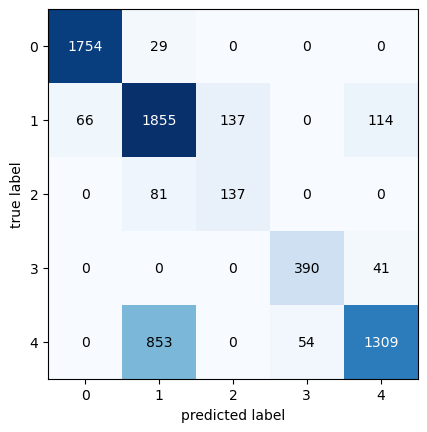

In [39]:
confusion_mat = confusion_matrix(y_test_labels,y_pred_labels)
plot_confusion_matrix(confusion_mat)

In [40]:
R.history.keys()

dict_keys(['accuracy', 'f1_score', 'loss', 'precision', 'recall', 'val_accuracy', 'val_f1_score', 'val_loss', 'val_precision', 'val_recall'])

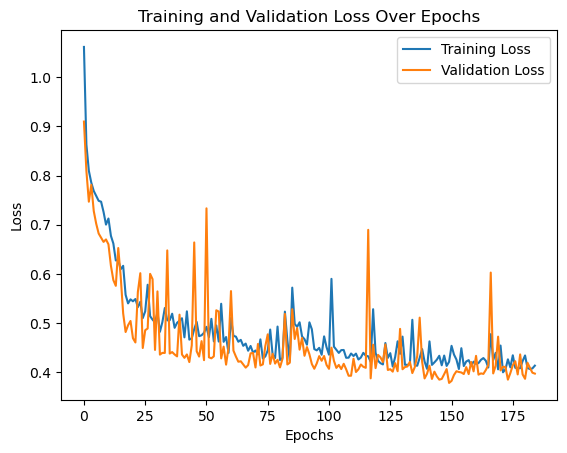

In [41]:
# Plot loss
plt.plot(R.history['loss'], label='Training Loss')
plt.plot(R.history['val_loss'], label='Validation Loss')



# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')

# Add a legend
plt.legend()

# Display the plot
plt.show()

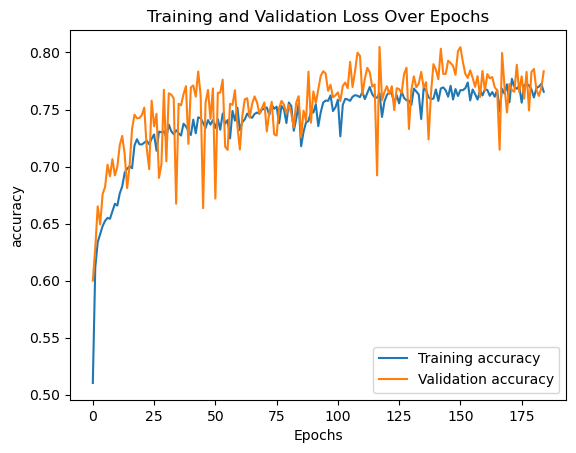

In [42]:
# Plot accuracy
plt.plot(R.history['accuracy'], label='Training accuracy')
plt.plot(R.history['val_accuracy'], label='Validation accuracy')


# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.title('Training and Validation Loss Over Epochs')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [43]:
model.save("../models/keras_model_1.keras")

In [44]:
tf.random.set_seed(42)
model_2 = tf.keras.models.Sequential()
model_2.add(tf.keras.layers.Input(shape=(n_features,))) # Changed line: shape should be a tuple
model_2.add(tf.keras.layers.Dense(2048, activation="swish",))
model_2.add(tf.keras.layers.Dense(1024, activation="swish",))
model_2.add(tf.keras.layers.Dense(512, activation="swish",))
model_2.add(tf.keras.layers.Dense(256, activation="swish",))
model_2.add(tf.keras.layers.Dense(n_classes, activation="softmax"))

In [45]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 2048)           │        12,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,767,877 (10.56 MB)

 Trainable params: 2,767,877 (10.56 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
optimizer_2 = tf.keras.optimizers.Adam(learning_rate=0.0004,weight_decay=1e-6)

In [47]:
model_2.compile(loss="categorical_crossentropy" #used because the target is number not hot encoded
,optimizer=optimizer_2,metrics=["accuracy", tf.keras.metrics.Precision(),
                              tf.keras.metrics.Recall(),
                              tf.keras.metrics.F1Score()])

In [48]:
checkpoint_b_2 = tf.keras.callbacks.ModelCheckpoint("../models/checkpoints_2.weights.h5",
save_weights_only=True, save_best_only = True)

early_stopping_b_2 = tf.keras.callbacks.EarlyStopping(patience=35,
restore_best_weights=True)

In [49]:
R_2 = model_2.fit(X_train,y_train,epochs=500, callbacks=[early_stopping_b_2,checkpoint_b_2],validation_data=(X_valid,y_valid))

Epoch 1/500
480/480 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4188 - f1_score: 0.2760 - loss: 1.2421 - precision_1: 0.5079 - recall_1: 0.1527 - val_accuracy: 0.5935 - val_f1_score: 0.4273 - val_loss: 0.8940 - val_precision_1: 0.6773 - val_recall_1: 0.4579
Epoch 2/500
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5979 - f1_score: 0.4598 - loss: 0.8894 - precision_1: 0.6667 - recall_1: 0.5061 - val_accuracy: 0.6358 - val_f1_score: 0.4947 - val_loss: 0.8140 - val_precision_1: 0.7051 - val_recall_1: 0.5576
Epoch 3/500
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6297 - f1_score: 0.4914 - loss: 0.8150 - precision_1: 0.7053 - recall_1: 0.5600 - val_accuracy: 0.6407 - val_f1_score: 0.5065 - val_loss: 0.7910 - val_precision_1: 0.7086 - val_recall_1: 0.5568
Epoch 4/500
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6396 - f1_score: 0.4984 - loss: 0.7882 - precision_1: 0.7154 - recall_1: 0.5624 - val_accuracy: 0.6622 - val_f1_score: 0.5181 - val_loss: 0.7613 - val

In [50]:
checkpoint_b_2.best

0.17370933294296265

In [51]:
model_2.evaluate(X_test,y_test)

  1/214 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.8750 - f1_score: 0.8580 - loss: 0.2456 - precision_1: 0.8750 - recall_1: 0.8750

214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9020 - f1_score: 0.8270 - loss: 0.1855 - precision_1: 0.9027 - recall_1: 0.9006


[0.17948448657989502,
 0.904105544090271,
 0.9052167534828186,
 0.9032257795333862,
 <tf.Tensor: shape=(5,), dtype=float32, numpy=
 array([0.9991579 , 0.8933182 , 0.57812494, 0.7304859 , 0.90270627],
       dtype=float32)>]

In [64]:
X_test

,Fuel_Mdot,Tair,Treturn,Tsupply,Water_Mdot
8834,0.000000,0.0,0.000000,0.303325,0.157895
626,0.000000,0.3,0.000000,0.547623,0.105263
20841,0.333333,0.5,0.333333,0.369370,0.210526
5549,0.666667,0.5,0.666667,0.167167,0.736842
13218,0.666667,0.0,0.000000,0.259915,0.052632
...,...,...,...,...,...
18387,0.000000,0.3,1.000000,0.013697,0.947368
20472,0.333333,0.3,0.333333,0.201804,0.368421
410,0.000000,0.2,0.000000,0.803835,0.052632
21362,0.333333,0.7,1.000000,0.098287,0.842105


In [65]:
y_test

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]])

In [52]:
y_pred_2 = model_2.predict(X_test)

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [53]:
y_pred_2

array([[4.93086564e-20, 9.95456457e-01, 6.08627123e-36, 4.78123036e-42,
        4.54350142e-03],
       [9.91786301e-01, 8.17479193e-03, 1.02751176e-10, 1.01295159e-08,
        3.89270099e-05],
       [9.42998327e-07, 1.96089849e-01, 6.52862057e-20, 7.85149228e-15,
        8.03909242e-01],
       ...,
       [3.16082605e-09, 5.34952700e-01, 4.44657058e-01, 7.13000912e-03,
        1.32601904e-02],
       [4.08504099e-11, 3.59675623e-02, 1.85050912e-24, 2.79458930e-23,
        9.64032412e-01],
       [9.99994874e-01, 3.67086308e-08, 3.76246956e-23, 1.33363940e-14,
        5.14365274e-06]], dtype=float32)

In [54]:
y_pred_labels_2 = np.argmax(y_pred_2, axis=1)

In [55]:
y_pred_labels_2

array([1, 0, 4, ..., 1, 4, 0])

In [56]:
y_test

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]])

In [57]:
y_test_labels = np.argmax(y_test, axis=1)

In [58]:
y_test_labels

array([1, 0, 4, ..., 2, 4, 0])

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

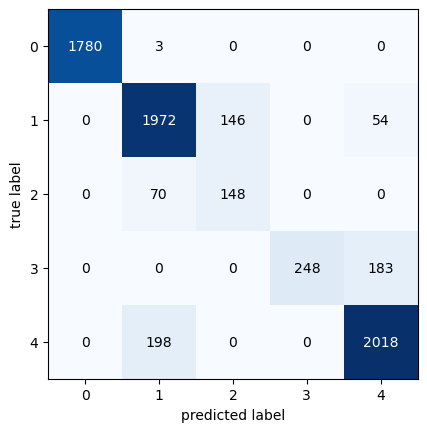

In [59]:
confusion_mat = confusion_matrix(y_test_labels,y_pred_labels_2)
plot_confusion_matrix(confusion_mat)

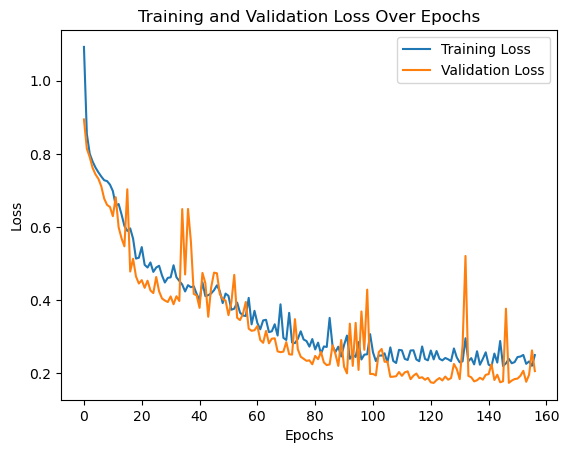

In [60]:
# Plot loss
plt.plot(R_2.history['loss'], label='Training Loss')
plt.plot(R_2.history['val_loss'], label='Validation Loss')



# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')

# Add a legend
plt.legend()

# Display the plot
plt.show()

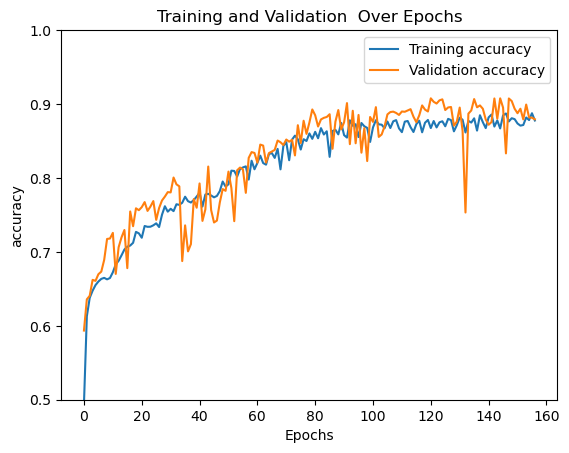

In [61]:
# Plot accuracy
plt.plot(R_2.history['accuracy'], label='Training accuracy')
plt.plot(R_2.history['val_accuracy'], label='Validation accuracy')


# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.title('Training and Validation  Over Epochs')
plt.ylim(.5, 1)
# Add a legend
plt.legend()

# Display the plot
plt.show()

In [62]:
model_2.save("../models/keras_model_2.keras")

In [63]:
X_test

,Fuel_Mdot,Tair,Treturn,Tsupply,Water_Mdot
8834,0.000000,0.0,0.000000,0.303325,0.157895
626,0.000000,0.3,0.000000,0.547623,0.105263
20841,0.333333,0.5,0.333333,0.369370,0.210526
5549,0.666667,0.5,0.666667,0.167167,0.736842
13218,0.666667,0.0,0.000000,0.259915,0.052632
...,...,...,...,...,...
18387,0.000000,0.3,1.000000,0.013697,0.947368
20472,0.333333,0.3,0.333333,0.201804,0.368421
410,0.000000,0.2,0.000000,0.803835,0.052632
21362,0.333333,0.7,1.000000,0.098287,0.842105
